# 🧠🔮 Prediction of Brain Stroke

## ❓Problem Statement
Stroke, a medical emergency that occurs due to the interruption of flow of blood to a part of brain because of bleeding or blood clots. Worldwide, it is the **second** major reason for deaths with an **annual mortality rate of 5.5 million**. Every year, more than **15 million** people worldwide have a stroke, and in every 4 minutes, someone dies due to stroke. A stroke is generally a consequence of a poor style of living and hence, preventable in up to 80% of the cases. Therefore, the prediction of stroke becomes necessary and should be used to prevent permanent damage by stroke. 


### 🩺 Types of Stroke

There are three main types of stroke:

1. Ischemic Stroke: This is the most common type, occurring when a blood clot or plaque blocks a blood vessel in the brain, cutting off the blood supply. It accounts for about 85% of all strokes.

2. Hemorrhagic Stroke: This type occurs when a blood vessel in the brain ruptures, causing bleeding in or around the brain. It is often caused by high blood pressure or aneurysms.

3. Transient Ischemic Attack (TIA): Often referred to as a "mini-stroke," TIAs are brief episodes of stroke-like symptoms caused by a temporary blockage of blood flow to the brain. While symptoms usually resolve within minutes to hours, TIAs can be a warning sign of a future stroke.

Each type of stroke requires different treatments, making early diagnosis crucial for improving outcomes.


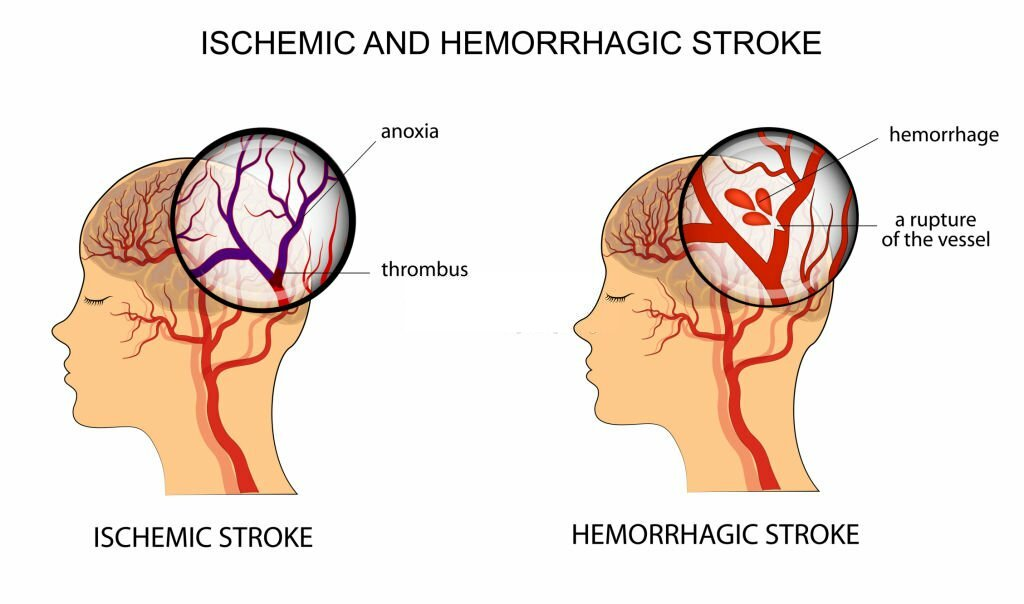
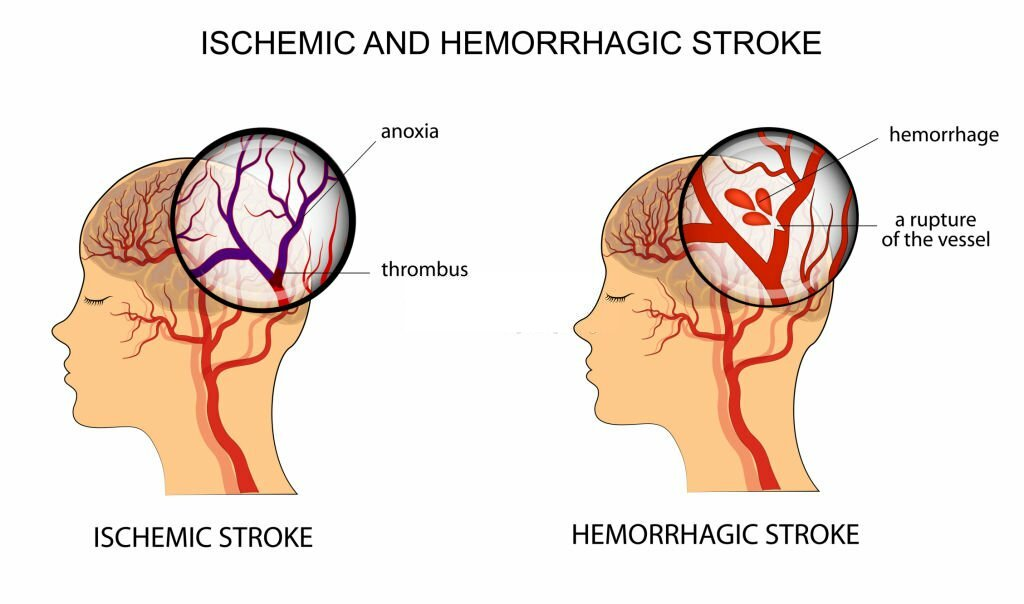

## 🎯 Aim of the Project:
The aim of this project is to predict the likelihood of a brain stroke using machine learning techniques. By analyzing medical data, we will train seven machine learning models to identify patterns and risk factors associated with stroke. This will help in early detection, providing valuable insights for preventive measures and timely intervention.

## 💿 Dataset Description:
The dataset used in this project contains medical records of patients and their associated risk factors for stroke. It includes the following features:

1. **Id:** Unique identification number for each patient.
2. **Age:** The age of the patient.
3. **Hypertension:** Whether the patient has hypertension (1 for yes, 0 for no).
4. **Heart Disease:** Whether the patient has a history of heart disease (1 for yes, 0 for no).
5. **Ever Married:** Whether the patient has been married (1 for yes, 0 for no).
6. **Work Type:** The type of work the patient does (e.g., private, self-employed, government, children).
7. **Residence Type:** Whether the patient resides in an urban or rural area.
8. **Glucose Level:** The patient's glucose level.
9. **BMI (Body Mass Index):** A measure of body fat based on height and weight.
10. **Smoking Status:** The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).
11. **Stroke:** The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).
    
This dataset is used to identify the risk factors contributing to stroke prediction, making it suitable for classification models to determine the likelihood of stroke based on these factors.

Now, let's begin to code! 👩‍💻

## 📚 Importing the libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')


## 📖 Reading the dataset

In [ ]:
dataset = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [ ]:
dataset

In [ ]:
#Creating a copy of dataset
data = dataset.copy()

## 🛠️ Data Preprocessing

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

### Replacing the missing values with mean

In [ ]:
#Filling the values with mean
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

### Dropping unnecessary columns

In [ ]:
data.drop(columns=['id'],axis=1,inplace=True) 
data


## 🔡 Encoding Categorical Variables

In [ ]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [ ]:
print('work_type : ', data['work_type'].unique())
print('gender : ', data['gender'].unique())
print('Residence_type : ', data['Residence_type'].unique())
print('ever"_married : ', data['ever_married'].unique())
print('smoking_status : ', data['smoking_status'].unique())

In [ ]:
le=LabelEncoder() #creating an isntance of LabelEncoder class
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [ ]:
#Replacing the above arrays in the data
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [ ]:
data

In [ ]:
data.nunique()

## 📊 Exploratory Data Analysis

### Correlation Heatmap

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Observations**

1. Strongest Positive Correlations:
- Age and Ever_married (0.68) show the strongest positive correlation, which is logical
- Age shows moderate positive correlations with BMI (0.33), hypertension (0.28), and smoking_status (0.27)

2. Notable Negative Correlations:
- Work_type has several negative correlations:
  * with age (-0.36)
  * with ever_married (-0.35)
  * with smoking_status (-0.31)
  * with BMI (-0.30)

3. Stroke Correlations:
- Stroke has weak positive correlations with most features
- Age has the strongest correlation with stroke (0.25)
- Heart_disease and hypertension both show weak positive correlations (0.13) with stroke

4. Weak/No Correlations:
- Residence_type shows almost no correlation with any other variables (all values near 0)
- Gender has very weak correlations with all other variables
- Most correlations in the dataset are relatively weak (below 0.3)

5. Health Factors:
- BMI, hypertension, and heart_disease show some intercorrelations, suggesting related health conditions
- Average glucose level has weak to moderate positive correlations with age (0.24) and other health indicators

This suggests that **age** is the most influential factor for stroke prediction.

### 📈 Univariate Analysis

In [ ]:
print(data['gender'].value_counts())
print(data['work_type'].value_counts())
print(data['Residence_type'].value_counts())
print(data['ever_married'].value_counts())
print(data['smoking_status'].value_counts())
print(data['hypertension'].value_counts())
print(data['heart_disease'].value_counts())

In [ ]:
print(dataset['gender'].value_counts())
print(dataset['work_type'].value_counts())
print(dataset['Residence_type'].value_counts())
print(dataset['ever_married'].value_counts())
print(dataset['smoking_status'].value_counts())

In [ ]:
gender = {"Female" : [2994], "Male" : [2115], "Other" : [1]}
wt = {"Private" : [2925], "Self-employed" : [819], "Children" : [687],'Govt job': [657], 'Never worked' : [22]}
rt = {"Urban" : [2596], "Rural" : [2514]}
evermarried = {"Yes" : [3353], "No" : [1757]}
smoke = {"Never smoked " : [1892], "Formerly smoked" : [885], "Smokes" : [789],"Unknown" : [1544]}
bp =  {"Yes " : [498], "No" : [4612]}
heartdisease= {"Yes " : [276], "No" : [4834]}
stroke = {"Yes " : [249], "No" : [4861]}


#### Gender Analysis

In [ ]:
plt.figure(figsize = (6, 6))
temp = [2994,2115]
labels = ['Female','Male']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart showing gender distribution')
plt.show()

#### Analysis of residence type

In [ ]:
plt.figure(figsize = (6, 6))
temp = [2596,2514]
labels = ['Urban','Rural']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', textprops=textprops)
plt.title('Pie chart for residence type')
plt.show()

#### Analysis of ever married

In [ ]:
plt.figure(figsize = (6, 6))
temp = [3353,1757]
labels = ['Yes','No']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart for ever married')
plt.show()

#### Work type analysis

In [ ]:
plt.figure(figsize=(6,6))
wt1 = [2925,819,687, 657, 22]
textprops = {"fontsize":13}
plt.pie(wt1,labels=['Private','Self employed', 'Children','Govt job','never worked'], autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart for Work Type')
plt.show()

#### Smoking status analysis

In [ ]:
plt.figure(figsize = (6, 6))
temp = [1892,885,789,1544]
labels = ['Never smoked','Formerly smoked', 'Smokes','Unknown']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('pie chart for smoking status')
plt.show()

#### Graphs for heart disease and hypertension

In [ ]:
bp = pd.DataFrame(data= bp)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=bp)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title("Hypertension")
plt.show()



In [ ]:
heartdisease = pd.DataFrame(data= heartdisease)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=heartdisease)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title("Heart Disease")
plt.show()


### 📉 Bivariate Analysis

#### Age, BMI, Average glucose level vs Stroke

In [ ]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')

In [ ]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=data, hue='stroke', bins=45)
pl.set_title('Average Glucose Level vs Stroke')

In [ ]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=data, hue='stroke', bins=40)
pl.set_title('Stroke vs BMI')

**Observations** 

Age vs Stroke:
1. Stroke incidents (shown in orange/gray) increase notably after age 40
2. The highest concentration of stroke cases appears in the 60-80 age range
3. Very few stroke cases are reported in patients under 40
4. The overall distribution shows age is a significant risk factor for strokes

Average Glucose Level vs Stroke:
1. Most non-stroke cases (blue) have glucose levels between 50-150 mg/dL
2. There's a peak distribution around 80-100 mg/dL for non-stroke cases
3. Stroke cases (shown in small numbers at bottom) appear more frequently in higher glucose ranges
4. The data suggests elevated glucose levels may increase stroke risk

BMI vs Stroke:
1. The majority of the population has BMI between 20-40
2. Peak distribution is around 25-35 BMI range
3. Stroke cases (gray) appear more frequently in the overweight and obese ranges (BMI > 25)
4. Extreme BMI values (both very low and very high) show lower case counts overall
5. The data suggests being overweight or obese may increase stroke risk, though the relationship appears less dramatic than with age or glucose levels


### Countplots

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
- Females make up the majority of the dataset (55.83% without stroke, 2.76% with stroke) compared to males (39.28% without stroke, 2.11% with stroke), though the proportion of strokes is relatively similar between genders, suggesting gender may not be a strong independent risk factor.

In [ ]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['smoking_status'],palette = 'YlOrBr',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**

- The highest proportion of non-stroke cases are among people who never smoked (35.26%), but interestingly, current smokers have a slightly lower stroke rate (0.82%) compared to those who never smoked (1.76%) or formerly smoked (1.37%), though this could be influenced by other factors like age distribution or sample size limitations.

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['heart_disease'],palette = 'YlOrBr')
ax.set_title("Heart disease VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
- The majority of people without heart disease (90.65%) also don't have strokes (0). Among those with heart disease (1), there are relatively low stroke rates (0.92%). However, having heart disease appears to be associated with a slightly higher stroke risk compared to those without heart disease.

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['Residence_type'],palette = 'YlOrBr')
ax.set_title("Residence Type VS Stroke",fontsize = 15)

**Observations**
- The distribution between urban and rural residents is fairly even for both stroke and non-stroke groups, suggesting that residence type may not be a strong predictor of stroke risk. The overall stroke prevalence is notably lower than non-stroke cases in both residential settings.

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['ever_married'],palette = 'YlOrBr')
ax.set_title("Marriage VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observations**
* Among those without stroke (0), there's a notably higher percentage of married people (61.31%) compared to unmarried people (33.82%). For those who had a stroke (1), the percentages are much lower but still show higher rates among married people (4.31%) compared to unmarried (0.57%).

In [ ]:
countplt, ax = plt.subplots(figsize = (7,7))
ax=sns.countplot(x=dataset['stroke'],hue=dataset['hypertension'],palette = 'YlOrBr')
ax.set_title("Hypertension VS Stroke",fontsize = 15)

for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(dataset)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

**Observation**
* People without hypertension (0) make up the largest group (86.67%) and mostly don't have strokes. Those with hypertension (1) show a higher relative risk of stroke (1.29%) compared to those without hypertension (3.58% without stroke), suggesting hypertension might be a risk factor for stroke.

## 🔍  Exploring need for oversampling

In [ ]:
stroke = pd.DataFrame(stroke)
plt.figure(figsize = (4, 4))
bargraph = sns.barplot(data=stroke)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()


plt.figure(figsize = (4, 4))
temp = [4861,249]
labels = ['Yes','No']
colors = ['#ff9999','#ffcc99'] 
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', colors = colors,textprops = textprops )
plt.title('Presence of stroke in people')
plt.legend(title = "Stroke")
plt.show()

In [ ]:
print((data['stroke']).value_counts())

In [ ]:
print("The number of positive cases is : 249")
print("The number of negative cases is : 4861")
print("The percentage of positive cases is :", 249/5110*100)

## 𐄷 Oversampling using SMOTE

In [ ]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)


In [ ]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X1, Y1 = smote.fit_resample(X, Y)

In [ ]:
Y.value_counts()

In [ ]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

In [ ]:
X1

In [ ]:
X1.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status']
X1

In [ ]:
Y1

## ✂️ Training and test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)

In [ ]:
Y_train.value_counts()

## 🤖 Model Training

### 1. Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred_NB = NB.predict(X_test)
NB_accuracy = accuracy_score(Y_test,Y_pred_NB)
print(NB_accuracy*100,'%')

CM = confusion_matrix(Y_test, Y_pred_NB)
print("\nConfusion Matrix: \n", CM)


In [ ]:
print(classification_report(Y_test, Y_pred_NB))

In [ ]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_NB = NB.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score_NB)
print('roc_auc_score for Gaussian Naive Bayes: ', roc_auc_score(Y_test, y_score_NB))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Gaussian Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 2. Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_Res_LR=LR.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, Y_Res_LR)
print(LR_Accuracy*100,'%')

In [ ]:
CM = confusion_matrix(Y_test, Y_Res_LR)
print(CM)

In [ ]:
print(classification_report(Y_test, Y_Res_LR))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_LR = LR.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score_LR)

In [ ]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score_LR))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. Decision Tree Classifier

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)


In [ ]:
print(DTC.feature_importances_)
print(X_train.columns)

In [ ]:
Y_pred_DTC = DTC.predict(X_test)
DTC_Accuracy = accuracy_score(Y_test, Y_pred_DTC)
print(DTC_Accuracy*100,'%')

In [ ]:
imp_feature = {"Features" : [ 'age','Residence_type', 'hypetension','avg_glucose_level','smoking_status','work_type','heart_disease','bmi','ever_married','gender'],
         'values' : [0.4406506, 0.0940964,0.08614509, 0.07980055, 0.07281029,0.05769702,0.04967563,0.04671055,0.03678735,0.03562653]}                
imp_feature = pd.DataFrame(data=imp_feature)
imp_feature

In [ ]:
plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature['values'], y = imp_feature['Features'], data=imp_feature)
plt.xlabel('Features')
plt.title("Feature Importances for Decision Tree Classifier")
plt.show()



In [ ]:

CM = confusion_matrix(Y_test, Y_pred_DTC)
print(CM)

In [ ]:
print(classification_report(Y_test, Y_pred_DTC))

In [ ]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_DTC = DTC.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, y_score_DTC)
print('roc_auc_score for Decision Tree Classifier: ', roc_auc_score(Y_test, y_score_DTC))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 4. KNN

In [ ]:
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train,Y_train)
Y_Res_KNN=KNN_clf.predict(X_test)
KNN_Accuracy = accuracy_score(Y_test, Y_Res_KNN)
print(KNN_Accuracy*100,'%')

In [ ]:

CM = confusion_matrix(Y_test, Y_Res_KNN)
print(CM)

In [ ]:
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])
print(classification_report(Y_test, Y_Res_KNN))

In [ ]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_KNN = KNN_clf.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, y_score_KNN)
print('roc_auc_score for K Nearest Neighbour is: ', roc_auc_score(Y_test, y_score_KNN))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - K Nearest Neighbor')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 5. AdaBoost Classifier

In [ ]:
ADC = AdaBoostClassifier()
ADC.fit(X_train,Y_train)
Y_pred_ADC = ADC.predict(X_test)
ADC_Accuracy = accuracy_score(Y_test,Y_pred_ADC)
print(ADC_Accuracy*100,"%")


In [ ]:

CM = confusion_matrix(Y_test, Y_pred_ADC)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

In [ ]:
print(classification_report(Y_test, Y_pred_ADC))

In [ ]:
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_ADC = ADC.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, y_score_ADC)

In [ ]:
print('roc_auc_score for AdaBoost is: ', roc_auc_score(Y_test, y_score_ADC))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 6. Random Forest Classifier

In [ ]:
RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,Y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

In [ ]:

CM = confusion_matrix(Y_test, Y_Res_RF)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

In [ ]:

print(classification_report(Y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_RF = RF.predict_proba(X_test)[:,1]
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(Y_test, y_score_RF)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_RF))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate7, true_positive_rate7)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 7. XGBoost

In [ ]:
XG_classifier = XGBClassifier()
XG_classifier.fit(X_train, Y_train)
Y_pred_xg = XG_classifier.predict(X_test)
XG_Accuracy = accuracy_score(Y_test,Y_pred_xg)
print(XG_Accuracy*100,"%")

In [ ]:
features = X_train.columns
importances = XG_classifier.feature_importances_
print(features)
print(importances)

In [ ]:
imp_feature_xg = {'features' : ['age','Residence_type', 'gender','hypertension','work_type','heart_disease','smoking_status','ever_married','bmi', 'avg_glucose_level'] , 'values' : [ 0.20928001,0.16508496,0.1434009,0.10393379,0.10006149,0.09203752,0.08475993,0.06718082,0.02110756,0.01315293]}
imp_feature_xg = pd.DataFrame(imp_feature_xg)


In [ ]:
plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature_xg['values'], y = imp_feature_xg['features'], data=imp_feature_xg)
plt.xlabel('Relative Importances')
plt.title("Feature Importances for XGBoost")
plt.show()

In [ ]:
CM = confusion_matrix(Y_test, Y_pred_xg)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

print("\n", classification_report(Y_test, Y_pred_xg))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

In [ ]:
y_score_xg = XG_classifier.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(Y_test, y_score_xg)
print('roc_auc_score for XGBoost is: ', roc_auc_score(Y_test, y_score_xg))

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 📋 Model Evaluation

In [ ]:
A = {'Models' : ['Gaussian Naive Bayes','Logistic Regression', 'Decision Tree Classifier', 'K Nearest Neighbors', 'AdaBoost','XGBoost', 'Random Forest Classifier'],'AUC Scores' :[ roc_auc_score(Y_test, y_score_NB), roc_auc_score(Y_test, y_score_LR), roc_auc_score(Y_test, y_score_DTC), roc_auc_score(Y_test, y_score_KNN), roc_auc_score(Y_test, y_score_ADC), roc_auc_score(Y_test, y_score_xg), roc_auc_score(Y_test, y_score_RF)]}
A = pd.DataFrame(A)
A

In [ ]:
fig, ax = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(20)

ax[0, 0].set_title('Receiver Operating Characteristic - Gaussian Naive Bayes')
ax[0, 0].plot(false_positive_rate1, true_positive_rate1, color = 'red', label = 'Gaussian Naive Bayes')
ax[0, 0].legend()
ax[0, 0].plot([0, 1], ls="--")
ax[0, 0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[0, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[0, 1].set_title('Receiver Operating Characteristic - Logistic Regression')
ax[0, 1].plot(false_positive_rate2, true_positive_rate2,color = 'green', label = 'Logistic Regression')
ax[0, 1].plot([0, 1], ls="--")
ax[0, 1].legend()
ax[0, 1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[0, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[0, 2].set_title('Receiver Operating Characteristic - Decision Tree Classifier')
ax[0, 2].plot(false_positive_rate3, true_positive_rate3,color = 'darkorange', label = 'Decision Tree Classifier')
ax[0, 2].legend()
ax[0, 2].plot([0, 1], ls="--")
ax[0, 2].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[0, 2].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[1, 0].set_title('Receiver Operating Characteristic - K Nearest Neighbors')
ax[1, 0].plot(false_positive_rate4, true_positive_rate4,color = 'blue', label = 'KNN')
ax[1, 0].legend()
ax[1, 0].plot([0, 1], ls="--")
ax[1, 0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[1, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')


ax[1, 1].set_title('Receiver Operating Characteristic - AdaBoost')
ax[1, 1].plot(false_positive_rate5, true_positive_rate5,color = 'darkturquoise', label = 'AdaBoost')
ax[1, 1].legend()
ax[1, 1].plot([0, 1], ls="--")
ax[1, 1].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[1, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[1, 2].set_title('Receiver Operating Characteristic - XGBoost')
ax[1, 2].plot(false_positive_rate6, true_positive_rate6,color = 'limegreen', label = 'XGBoost')
ax[1, 2].legend()
ax[1, 2].plot([0, 1], ls="--")
ax[1, 2].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[1, 2].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

ax[2, 0].set_title('Receiver Operating Characteristic - Random Forest Classifier')
ax[2, 0].plot(false_positive_rate7, true_positive_rate7, color = 'purple', label = 'RandomForest')
ax[2, 0].legend()
ax[2, 0].plot([0, 1], ls="--")
ax[2, 0].plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
ax[2, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')


ax[2, 1].set_visible(False)
ax[2, 2].set_visible(False)

fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Comparision of ROC Curves')
plt.plot(false_positive_rate1, true_positive_rate1, color = 'red', label = 'Gaussian NB (AUC = 0.838) ')
plt.plot(false_positive_rate2, true_positive_rate2, color = 'green', label = 'Logistic Regression (AUC = 0.854)')
plt.plot(false_positive_rate3, true_positive_rate3, color = 'darkorange', label = 'Decision Trees (AUC = 0.939)')
plt.plot(false_positive_rate4, true_positive_rate4, color = 'blue', label = 'KNN (AUC = 0.951)')
plt.plot(false_positive_rate5, true_positive_rate5, color = 'darkturquoise', label = 'AdaBoost (AUC = 0.986)')
plt.plot(false_positive_rate6, true_positive_rate6, color = 'limegreen', label = 'XGBoost (AUC = 0.991)')
plt.plot(false_positive_rate7, true_positive_rate7, color = 'purple', label = 'Random Forest (AUC = 0.995)')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


## 🏁 Conclusion
* All models perform significantly better than random chance (represented by the diagonal dashed line in the ROC curve)
* The ensemble methods (XGBoost, Random Forest, AdaBoost) consistently outperform the simpler algorithms
* There's a notable performance gap between the ensemble methods and traditional algorithms like Naive Bayes and Logistic Regression
* For optimal performance, XGBoost or Random Forest would be the best choices as they demonstrate the highest and most consistent performance
* If computational resources are limited, KNN could serve as a good alternative with relatively strong performance

### Note: 
I have also published a research paper on this topic. You can find it [here](https://ieeexplore.ieee.org/document/9734197).